In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup as BS
import requests
import re
import json
import pprint 
import calendar
import datetime

%matplotlib inline

In [2]:
fhfa_data = pd.read_csv('2021_pudb_export_123121.csv')

In [3]:
fhfa_data.head()

,Year,LoanCharacteristicsID,Bank,FIPSStateNumericCode,FIPSCountyCode,CoreBasedStatisticalAreaCode,CensusTractIdentifier,CensusTractMinorityRatioPercent,CensusTractMedFamIncomeAmount,LocalAreaMedianIncomeAmount,...,Borrower1Race3Type,Borrower1Race4Type,Borrower1Race5Type,Borrower2EthnicityType,Borrower2Race2Type,Borrower2Race3Type,Borrower2Race4Type,Borrower2Race5Type,HOEPALoanStatusType,LienPriorityType
0,2021,2585135,Boston,23,5,38860,45.02,6.379,91316,85144,...,7,7,7,3,7,7,7,7,2,1
1,2021,2585136,Boston,23,5,38860,41.00,3.553,100396,85144,...,7,7,7,5,8,8,8,8,2,1
2,2021,2585137,Boston,25,27,49340,7011.00,8.537,87500,91102,...,7,7,7,5,8,8,8,8,2,1
3,2021,2585138,Boston,25,27,49340,7001.00,6.052,114531,91102,...,7,7,7,2,7,7,7,7,2,1
4,2021,2585139,Boston,25,27,49340,7061.00,3.583,119423,91102,...,7,7,7,5,8,8,8,8,2,1


In [4]:
fhfa_data.columns

Index(['Year', 'LoanCharacteristicsID', 'Bank', 'FIPSStateNumericCode',
       'FIPSCountyCode', 'CoreBasedStatisticalAreaCode',
       'CensusTractIdentifier', 'CensusTractMinorityRatioPercent',
       'CensusTractMedFamIncomeAmount', 'LocalAreaMedianIncomeAmount',
       'TotalMonthlyIncomeAmount', 'HUDMedianIncomeAmount',
       'LoanAcquisitionActualUPBAmt', 'LTVRatioPercent', 'NoteDate',
       'LoanAcquisitionDate', 'LoanPurposeType', 'ProductCategoryName',
       'MortgageType', 'ScheduledTotalPaymentCount',
       'LoanAmortizationMaxTermMonths', 'MortgageLoanSellerInstType',
       'BorrowerCount', 'BorrowerFirstTimeHomebuyer', 'Borrower1Race1Type',
       'Borrower2Race1Type', 'Borrower1GenderType', 'Borrower2GenderType',
       'Borrower1AgeAtApplicationYears', 'Borrower2AgeAtApplicationYears',
       'PropertyUsageType', 'PropertyUnitCount', 'NoteRatePercent',
       'NoteAmount', 'HousingExpenseRatioPercent',
       'TotalDebtExpenseRatioPercent', 'Borrower1CreditScoreValu

In [5]:
fhfa_data.columns = [col.lower() for col in fhfa_data.columns]

In [6]:
fhfa_data.columns

Index(['year', 'loancharacteristicsid', 'bank', 'fipsstatenumericcode',
       'fipscountycode', 'corebasedstatisticalareacode',
       'censustractidentifier', 'censustractminorityratiopercent',
       'censustractmedfamincomeamount', 'localareamedianincomeamount',
       'totalmonthlyincomeamount', 'hudmedianincomeamount',
       'loanacquisitionactualupbamt', 'ltvratiopercent', 'notedate',
       'loanacquisitiondate', 'loanpurposetype', 'productcategoryname',
       'mortgagetype', 'scheduledtotalpaymentcount',
       'loanamortizationmaxtermmonths', 'mortgageloansellerinsttype',
       'borrowercount', 'borrowerfirsttimehomebuyer', 'borrower1race1type',
       'borrower2race1type', 'borrower1gendertype', 'borrower2gendertype',
       'borrower1ageatapplicationyears', 'borrower2ageatapplicationyears',
       'propertyusagetype', 'propertyunitcount', 'noteratepercent',
       'noteamount', 'housingexpenseratiopercent',
       'totaldebtexpenseratiopercent', 'borrower1creditscorevalu

In [7]:
fhfa_data.head()

,year,loancharacteristicsid,bank,fipsstatenumericcode,fipscountycode,corebasedstatisticalareacode,censustractidentifier,censustractminorityratiopercent,censustractmedfamincomeamount,localareamedianincomeamount,...,borrower1race3type,borrower1race4type,borrower1race5type,borrower2ethnicitytype,borrower2race2type,borrower2race3type,borrower2race4type,borrower2race5type,hoepaloanstatustype,lienprioritytype
0,2021,2585135,Boston,23,5,38860,45.02,6.379,91316,85144,...,7,7,7,3,7,7,7,7,2,1
1,2021,2585136,Boston,23,5,38860,41.00,3.553,100396,85144,...,7,7,7,5,8,8,8,8,2,1
2,2021,2585137,Boston,25,27,49340,7011.00,8.537,87500,91102,...,7,7,7,5,8,8,8,8,2,1
3,2021,2585138,Boston,25,27,49340,7001.00,6.052,114531,91102,...,7,7,7,2,7,7,7,7,2,1
4,2021,2585139,Boston,25,27,49340,7061.00,3.583,119423,91102,...,7,7,7,5,8,8,8,8,2,1


In [8]:
column_names = ['borrower1ethnicitytype', 'borrower1race2type', 'borrower1race3type',
                'borrower1race4type', 'borrower1race5type', 'borrower2ethnicitytype',
                'borrower2race2type', 'borrower2race3type', 'borrower2race4type',
                'borrower2race5type']

replace_dict = {1: "aian", 2: "asian", 3: "black", 4: "nhopi", 5: "white",
                6: "multiple", 7: "hispanic", 8: "na", 9: "unknown"}

fhfa_data[column_names] = fhfa_data[column_names].replace(replace_dict)

In [9]:
fhfa_data.head()

,year,loancharacteristicsid,bank,fipsstatenumericcode,fipscountycode,corebasedstatisticalareacode,censustractidentifier,censustractminorityratiopercent,censustractmedfamincomeamount,localareamedianincomeamount,...,borrower1race3type,borrower1race4type,borrower1race5type,borrower2ethnicitytype,borrower2race2type,borrower2race3type,borrower2race4type,borrower2race5type,hoepaloanstatustype,lienprioritytype
0,2021,2585135,Boston,23,5,38860,45.02,6.379,91316,85144,...,hispanic,hispanic,hispanic,black,hispanic,hispanic,hispanic,hispanic,2,1
1,2021,2585136,Boston,23,5,38860,41.00,3.553,100396,85144,...,hispanic,hispanic,hispanic,white,na,na,na,na,2,1
2,2021,2585137,Boston,25,27,49340,7011.00,8.537,87500,91102,...,hispanic,hispanic,hispanic,white,na,na,na,na,2,1
3,2021,2585138,Boston,25,27,49340,7001.00,6.052,114531,91102,...,hispanic,hispanic,hispanic,asian,hispanic,hispanic,hispanic,hispanic,2,1
4,2021,2585139,Boston,25,27,49340,7061.00,3.583,119423,91102,...,hispanic,hispanic,hispanic,white,na,na,na,na,2,1


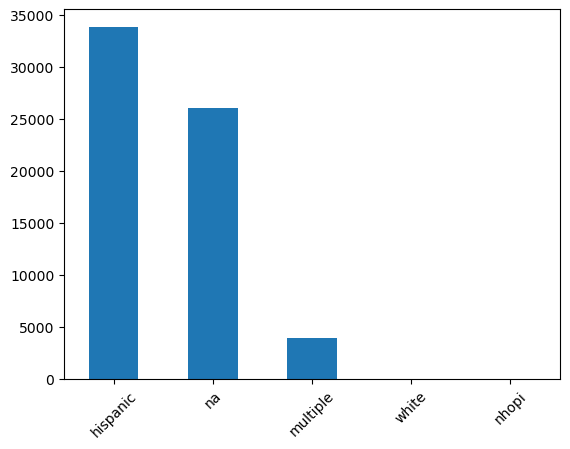

In [17]:
fhfa_data['borrower2race3type'].value_counts().head().plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

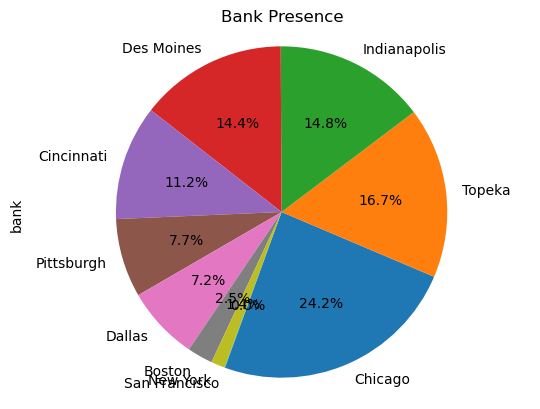

In [14]:
bank_counts = fhfa_data['bank'].value_counts()

bank_counts.plot(kind='pie', autopct='%1.1f%%', startangle=250)
plt.axis('equal')
plt.title('Bank Presence')
plt.xticks(rotation=45)
plt.show()

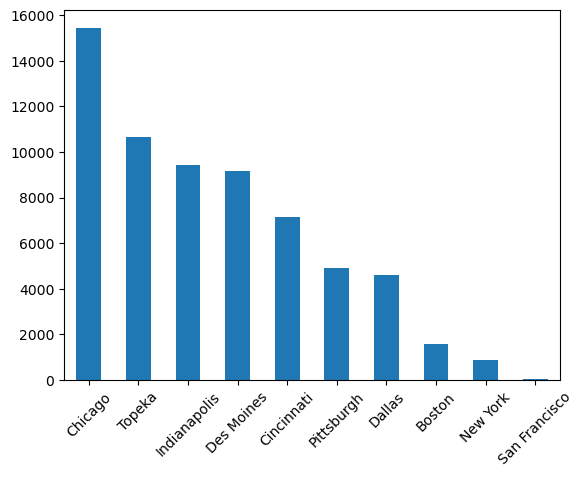

In [16]:
fhfa_data['bank'].value_counts().plot(kind= 'bar')
plt.xticks(rotation=45)
plt.show()

In [13]:
fhfa_data['borrower1race1type].value_counts(dropna = False)

hispanic    56663
multiple     7216
white          10
black           1
Name: borrower1race3type, dtype: int64

In [19]:
fhfa_data.describe()

,year,loancharacteristicsid,fipsstatenumericcode,fipscountycode,corebasedstatisticalareacode,censustractidentifier,censustractminorityratiopercent,censustractmedfamincomeamount,localareamedianincomeamount,totalmonthlyincomeamount,...,housingexpenseratiopercent,totaldebtexpenseratiopercent,borrower1creditscorevalue,borrower2creditscorevalue,pmicoveragepercent,employmentborrowerselfemployed,indexsourcetype,marginratepercent,hoepaloanstatustype,lienprioritytype
count,63890.0,6.389000e+04,63890.000000,63890.000000,63890.000000,63890.000000,63890.000000,63890.000000,63890.000000,63890.000000,...,63890.000000,63890.000000,63890.000000,63890.000000,63890.000000,63890.000000,63890.0,63890.000000,63890.000000,63890.0
mean,2021.0,2.626657e+06,30.169432,92.398842,44383.391767,3519.306456,13.702152,84251.561606,75034.526389,9770.325826,...,18.599258,29.687847,4.390202,6.313382,3.606718,0.116012,99.0,8520.669213,2.006496,1.0
std,0.0,2.864535e+04,14.163276,78.299504,31114.230250,4065.009753,15.551072,28090.094325,11642.076385,8978.051305,...,15.515244,9.619283,0.835068,2.317568,9.097475,0.320242,0.0,3549.163956,0.080528,0.0
min,2021.0,2.585135e+06,1.000000,1.000000,10100.000000,1.000000,0.000000,0.000000,0.000000,794.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,99.0,0.000000,1.000000,1.0
25%,2021.0,2.605211e+06,18.000000,37.000000,19820.000000,106.000000,4.000000,65672.000000,67277.000000,5405.250000,...,12.880000,22.400000,4.000000,5.000000,0.000000,0.000000,99.0,9999.000000,2.000000,1.0
50%,2021.0,2.622994e+06,27.000000,81.000000,33340.000000,803.000000,7.998500,78430.500000,73857.000000,8042.000000,...,17.250000,29.830000,5.000000,5.000000,0.000000,0.000000,99.0,9999.000000,2.000000,1.0
75%,2021.0,2.639190e+06,41.000000,131.000000,48580.000000,9002.000000,16.998000,97012.000000,80703.000000,11666.000000,...,22.950000,37.150000,5.000000,9.000000,0.000000,0.000000,99.0,9999.000000,2.000000,1.0
max,2021.0,2.690373e+06,66.000000,840.000000,99999.000000,9902.000000,99.866000,250001.000000,150332.000000,817114.000000,...,999.000000,102.840000,9.000000,9.000000,78.000000,1.000000,99.0,9999.000000,3.000000,1.0


# Banks in Chicago

In [20]:
chicago_banks = fhfa_data[fhfa_data['bank'] == 'Chicago']
len(chicago_banks)

15438

In [30]:
chicago_banks['borrower1race3type'].value_counts(dropna = False)

hispanic    15433
white           4
black           1
Name: borrower1race3type, dtype: int64

# Banks in Topeka 

In [32]:
topeka_banks = fhfa_data[fhfa_data['bank'] == 'Topeka']
len(topeka_banks)

10666

In [33]:
topeka_banks['borrower1race3type'].value_counts(dropna = False)

hispanic    10664
white           2
Name: borrower1race3type, dtype: int64

# Banks in Indianapolis 

In [22]:
indianapolis_banks = fhfa_data[fhfa_data['bank'] == 'Indianapolis']
len(indianapolis_banks)

9446

In [34]:
indianapolis_banks['borrower1race3type'].value_counts(dropna = False)

hispanic    9446
Name: borrower1race3type, dtype: int64

# Banks in Des Moines  

In [36]:
des_moines_banks = fhfa_data[fhfa_data['bank'] == 'Des Moines']
len(des_moines_banks)

9184

In [37]:
des_moines_banks['borrower1race3type'].value_counts(dropna = False)

hispanic    9183
white          1
Name: borrower1race3type, dtype: int64

# Banks in Cincinnati  

In [24]:
cincinnati_banks = fhfa_data[fhfa_data['bank'] == 'Cincinnati']
len(cincinnati_banks)

7167

# Banks in Pittsburgh  

In [25]:
pittsburgh_banks = fhfa_data[fhfa_data['bank'] == 'Pittsburgh']
len(pittsburgh_banks)

4912

# Banks in Dallas 

In [26]:
dallas_banks = fhfa_data[fhfa_data['bank'] == 'Dallas']
len(dallas_banks)

4593

# Banks in Boston  

In [27]:
boston_banks = fhfa_data[fhfa_data['bank'] == 'Boston']
len(boston_banks)

1592

# Banks in New York  

In [28]:
new_york_banks = fhfa_data[fhfa_data['bank'] == 'New York']
len(new_york_banks)

871

# Banks in San Francisco  

In [29]:
san_francisco_banks = fhfa_data[fhfa_data['bank'] == 'San Francisco']
len(san_francisco_banks)

21